<a href="https://colab.research.google.com/github/JohnathanDoe22/Golden-cross-analysis/blob/main/50_200_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


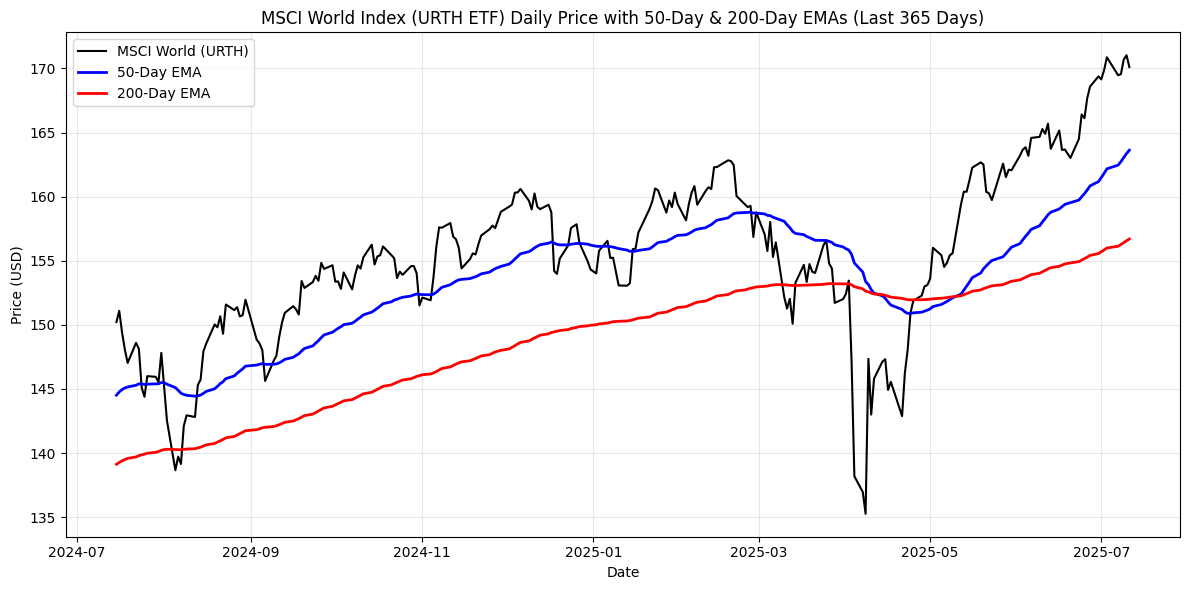

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

DISPLAY_DAYS = 365
REQUIRED_HISTORY_DAYS = DISPLAY_DAYS + 250

# Calculate data range
end_date = datetime.today()
data_start_date = end_date - timedelta(days=REQUIRED_HISTORY_DAYS)

# Download daily MSCI World Index data
msci_full = yf.download("URTH",
                        start=data_start_date.strftime("%Y-%m-%d"),
                        end=end_date.strftime("%Y-%m-%d"),
                        interval="1d",
                        auto_adjust=True)["Close"].dropna()

# Calculate 50-day and 200-day EMAs
ema50_full = msci_full.ewm(span=50, min_periods=1).mean()
ema200_full = msci_full.ewm(span=200, min_periods=1).mean()

# Trim to display period
display_start_date = end_date - timedelta(days=DISPLAY_DAYS)
mask = msci_full.index >= display_start_date

msci = msci_full[mask]
ema50 = ema50_full[mask]
ema200 = ema200_full[mask]


plt.figure(figsize=(12, 6))
plt.plot(msci.index, msci, label="MSCI World (URTH)", color="black", linewidth=1.5)
plt.plot(ema50.index, ema50, label="50-Day EMA", linewidth=2, color="blue")
plt.plot(ema200.index, ema200, label="200-Day EMA", linewidth=2, color="red")
plt.title(f"MSCI World Index (URTH ETF) Daily Price with 50-Day & 200-Day EMAs (Last {DISPLAY_DAYS} Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Data range: 2023-11-05 to 2025-07-12


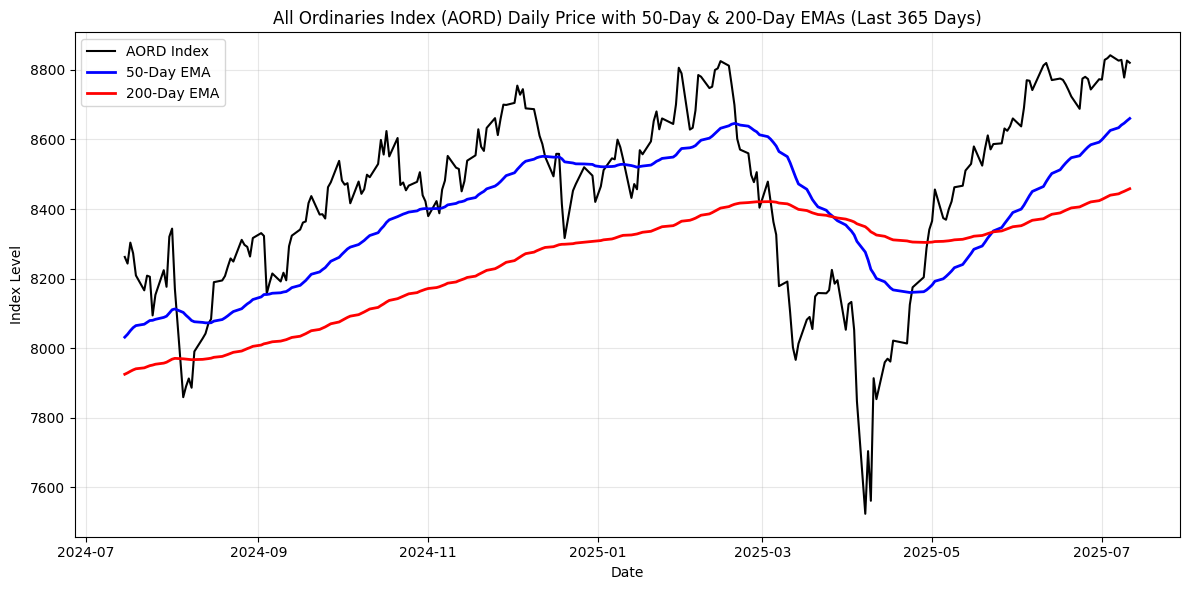

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

DISPLAY_DAYS = 365
REQUIRED_HISTORY_DAYS = DISPLAY_DAYS + 250

# Calculate data range
end_date = datetime.today()
data_start_date = end_date - timedelta(days=REQUIRED_HISTORY_DAYS)

print(f"Downloading {REQUIRED_HISTORY_DAYS} days of data to ensure proper 200-day EMA calculation")
print(f"Data range: {data_start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

# Download daily AORD  data
aord_full = yf.download("^AORD",
                        start=data_start_date.strftime("%Y-%m-%d"),
                        end=end_date.strftime("%Y-%m-%d"),
                        interval="1d",  # Daily data for day-based EMAs
                        auto_adjust=True)["Close"].dropna()

# Calculate 50-day and 200-day EMAs
ema50_full = aord_full.ewm(span=50, min_periods=1).mean()
ema200_full = aord_full.ewm(span=200, min_periods=1).mean()

# Trim to display period
display_start_date = end_date - timedelta(days=DISPLAY_DAYS)
mask = aord_full.index >= display_start_date

aord = aord_full[mask]
ema50 = ema50_full[mask]
ema200 = ema200_full[mask]

plt.figure(figsize=(12, 6))
plt.plot(aord.index, aord, label="AORD Index", color="black", linewidth=1.5)
plt.plot(ema50.index, ema50, label="50-Day EMA", linewidth=2, color="blue")
plt.plot(ema200.index, ema200, label="200-Day EMA", linewidth=2, color="red")
plt.title(f"All Ordinaries Index (AORD) Daily Price with 50-Day & 200-Day EMAs (Last {DISPLAY_DAYS} Days)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
